In [1]:
!pip install pandas 
!pip install --upgrade pandas


In [19]:
import pandas as pd

# Carica il dataset da un file CSV
cyclists = pd.read_csv('dataset/dataset/cyclists.csv')
races = pd.read_csv('dataset/dataset/races.csv')
# Mostra le prime righe del dataset
cyclists.head()


,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [3]:
cyclists.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [20]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [26]:
races['points'] = races['points'].astype(object)
races['uci_points'] = races['uci_points'].astype(object)
races['profile'] = races['profile'].astype(object)
races['startlist_quality'] = races['startlist_quality'].astype(object)



Lo startlist_quality della gara è davvero categorico? Dato che è un valore che non è cappato potrebbe essere numerico.

In [27]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  object 
 3   uci_points           251086 non-null  object 
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  object 
 7   startlist_quality    589865 non-null  object 
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [21]:
cyclists.select_dtypes(include="number")


,birth_year,weight,height
0,1964.0,NaN,NaN
1,1965.0,74.0,182.0
2,1996.0,69.0,189.0
3,1995.0,78.0,192.0
4,1997.0,55.0,171.0
...,...,...,...
6129,1966.0,NaN,NaN
6130,1998.0,75.0,188.0
6131,1973.0,NaN,NaN
6132,1985.0,58.0,170.0


In [23]:
races.isnull().sum()

_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64

In [32]:
races_numerical = races.select_dtypes(include="number")


In [5]:
# Let's see how many missing values there are

cyclists.isnull().sum()

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

Almost half of the values for weight and height are missing, can we replace them somehow?
Regarding the birth year, only 13 values are missing, we can easily drop those records without losing too much, but maybe we don't need birth year for the analysis? Same for nationality.

In [6]:
!pip install seaborn

c:\Users\feder\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


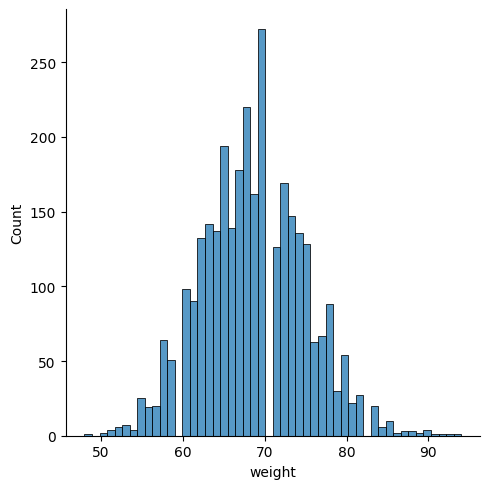

In [12]:
import seaborn

seaborn.displot(cyclists, 
                x="weight", 
                kind="hist",
                row_order="desc",
                bins=50)

In [8]:
!pip install scipy

In [38]:
from dataunderstanding import correlations

races_numerical = races_numerical.astype('double')
correlations = correlations(races_numerical)
correlations

c:\Users\feder\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,length,climb_total,average_temperature,position,cyclist_age,delta,correlation_type
length,1.000000,0.285099,-0.095313,-0.015373,-0.002381,0.029217,kendall
climb_total,0.285099,1.000000,-0.079710,-0.023858,0.005533,0.356194,kendall
average_temperature,-0.095313,-0.079710,1.000000,0.015593,0.033887,0.023630,kendall
position,-0.015373,-0.023858,0.015593,1.000000,0.006378,0.296542,kendall
cyclist_age,-0.002381,0.005533,0.033887,0.006378,1.000000,-0.002685,kendall
delta,0.029217,0.356194,0.023630,0.296542,-0.002685,1.000000,kendall
length,1.000000,0.520616,-0.070199,-0.012024,0.003442,0.092850,pearson
climb_total,0.520616,1.000000,-0.128367,-0.040156,0.007315,0.371062,pearson
average_temperature,-0.070199,-0.128367,1.000000,0.022707,0.040716,0.056668,pearson
position,-0.012024,-0.040156,0.022707,1.000000,0.011984,0.272020,pearson


In [9]:
# Let's see the correlation between numerical data

correlations = correlations(cyclists)
correlations


,birth_year,weight,height,correlation_type
birth_year,1.000000,-0.063740,0.094976,kendall
weight,-0.063740,1.000000,0.539760,kendall
height,0.094976,0.539760,1.000000,kendall
birth_year,1.000000,-0.104242,0.154252,pearson
weight,-0.104242,1.000000,0.720732,pearson
height,0.154252,0.720732,1.000000,pearson
birth_year,1.000000,-0.091220,0.137001,spearman
weight,-0.091220,1.000000,0.705189,spearman
height,0.137001,0.705189,1.000000,spearman


# High correlation between height and weight
As we can expect, weight and height are highly correlated, maybe we can merge the two features into one index?

# Obbiettivi:
- Capire i campi e a cosa possono servire
- Quanti campi sono null per ogni matrice
- pene
- Che tipo di cleaning poter fare
- 